<a href="https://colab.research.google.com/github/votrung654/CS114.O21/blob/main/MLP_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Đọc dữ liệu
data = pd.read_csv('/content/sample_data/heart.csv')



In [3]:
# Chia thành features và labels
X = data.drop("target", axis=1)
y = data["target"]

In [4]:
# Scale dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Chia thành tập train và tập test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=55)



In [6]:
# Huấn luyện mô hình MLP
clf = MLPClassifier(hidden_layer_sizes=(3, 30), max_iter=500)
clf.fit(X_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 30), max_iter=500)

In [7]:
# Dự đoán nhãn cho dữ liệu test
y_pred = clf.predict(X_test)



In [8]:
# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)



In [9]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8863636363636364
Precision: 0.8448275862068966
Recall: 0.9483870967741935
F1 score: 0.8936170212765956


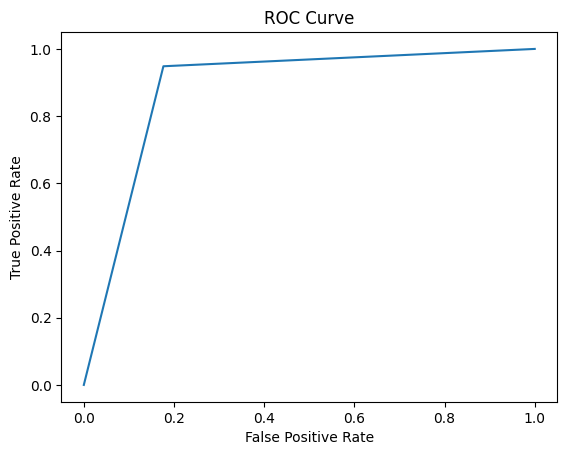

In [10]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

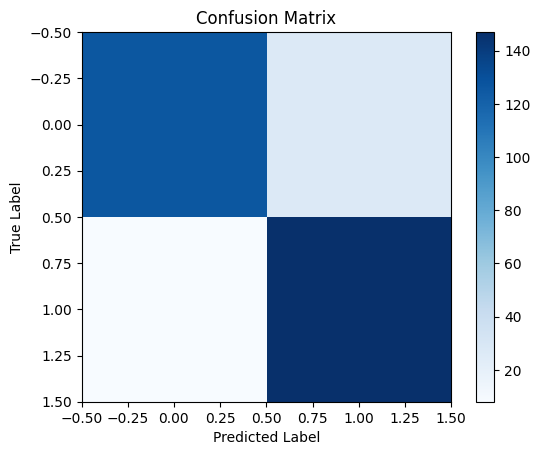

In [11]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()